In [303]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Chebyshev:
    """
    Chebyshev(a, b, n, func)
    Given a function func, lower and upper limits of the interval [a,b],
    and maximum degree n, this class computes a Chebyshev approximation
    of the function.
    Method eval(x) yields the approximated function value.
    """
    def __init__(self, a, b, n, func):
        n = n + 1 
        self.a = a
        self.b = b
        self.func = func
        
        bma = 0.5 * (b - a)
        bpa = 0.5 * (b + a)
        f = [func(math.cos(math.pi * (k + 0.5) / n) * bma + bpa) for k in range(n)]
        self.roots = f
        
        self.x = [math.cos(math.pi * (k + 0.5) / n) * bma + bpa for k in range(n)]

        fac = 2.0 / n
        self.c = [fac * sum([f[k] * math.cos(math.pi * j * (k + 0.5) / n)
                  for k in range(n)]) for j in range(n)]
        
        self.c = [round(x, 10) for x in self.c]

    def eval(self, x):
        a,b = self.a, self.b
        #assert(a <= x <= b)
        y = (2.0 * x - a - b) * (1.0 / (b - a))
        y2 = 2.0 * y
        (d, dd) = (self.c[-1], 0)             # Special case first step for efficiency
        for cj in self.c[-2:0:-1]:            # Clenshaw's recurrence
            (d, dd) = (y2 * d - dd + cj, d)
        return y * d - dd + 0.5 * self.c[0]   # Last step is different

In [304]:
a = -6
b = 6

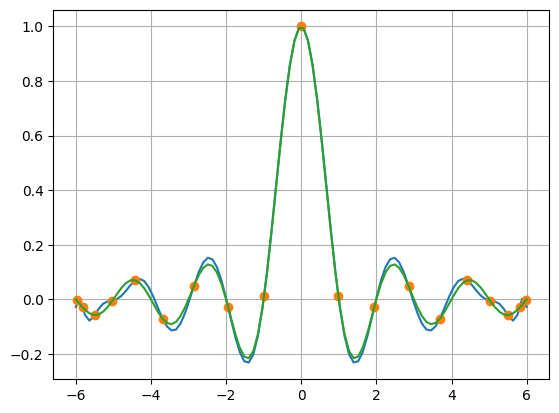

In [305]:
fun = np.sinc
c = Chebyshev(a, b, 18, fun)

x = np.linspace(a, b, 100)
y = np.vectorize(c.eval)(x)


plt.grid()
plt.plot(x, y)
plt.plot(c.x, np.vectorize(fun)(c.x), 'o')
plt.plot(x, np.vectorize(fun)(x))
plt.show()

## $\ell_1$ norm

In [40]:
l1norms = []

for d in range(15,200):
    fun = np.sinc
    c = Chebyshev(-32, 32, d, fun)

    x = np.linspace(-32, 32, 10000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    l1norms.append(np.linalg.norm(y - y_correct, ord=1))

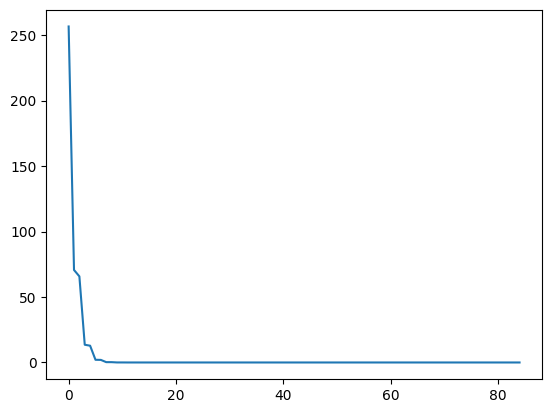

In [41]:
plt.plot(l1norms)

In [42]:
for i in range(len(l1norms)):
    print("(" +str(i+15) +", " + str(l1norms[i]) + ")" )

(15, 256.56900965480565)
(16, 70.64242521902443)
(17, 65.74335171756557)
(18, 13.546499715887986)
(19, 12.810307487945673)
(20, 2.0615485748057294)
(21, 1.971077907466386)
(22, 0.2556273642187613)
(23, 0.2463534557604446)
(24, 0.02637099020863009)
(25, 0.025565424969379098)
(26, 0.002301980164907857)
(27, 0.002241860842645725)
(28, 0.00017242313838701672)
(29, 0.0001685238487591361)
(30, 1.121253083349033e-05)
(31, 1.0990483223651551e-05)
(32, 6.393843344890721e-07)
(33, 6.282066428980738e-07)
(34, 3.224879136469505e-08)
(35, 3.1747329748621366e-08)
(36, 1.4488884328770444e-09)
(37, 1.4298825754423076e-09)
(38, 5.84147401597452e-11)
(39, 5.92966181722008e-11)
(40, 7.84677369418445e-12)
(41, 5.441298798204567e-12)
(42, 5.432612333028939e-12)
(43, 6.676901870800915e-12)
(44, 5.650820648672771e-12)
(45, 6.18967411572806e-12)
(46, 6.474686174170021e-12)
(47, 9.493047353842429e-12)
(48, 6.55579677526154e-12)
(49, 7.456606177376176e-12)
(50, 5.549800429735822e-12)
(51, 7.95829444079116e-12)


### $\ell_\infty$ norm

In [64]:
linfnorms = []

for d in range(15,247):
    fun = np.sinc
    c = Chebyshev(-32, 32, d, fun)

    x = np.linspace(-32, 32, 10000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    linfnorms.append(np.linalg.norm(y - y_correct, ord=np.inf))

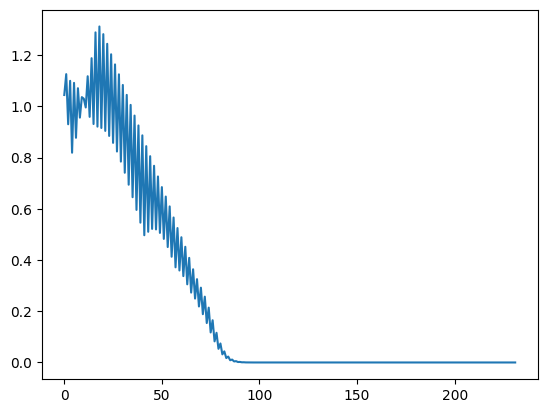

In [65]:
plt.plot(linfnorms)

In [66]:
for i in range(len(linfnorms)):
    print("(" +str(i+15) +", " + str(linfnorms[i]) + ")" )

(15, 1.044742780197616)
(16, 1.1262275727606186)
(17, 0.9304623548643409)
(18, 1.1001105092830972)
(19, 0.8193439753226607)
(20, 1.0921492559023118)
(21, 0.8776350678569829)
(22, 1.0712494618002566)
(23, 0.9563862985020906)
(24, 1.0364647198578927)
(25, 1.0303795837643228)
(26, 0.9960780775263516)
(27, 1.1180258059093409)
(28, 0.9593660691960191)
(29, 1.1885030102115417)
(30, 0.9313950535538037)
(31, 1.2893462708346393)
(32, 0.9212183954473286)
(33, 1.312399880557197)
(34, 0.9159535233675203)
(35, 1.2823845578971333)
(36, 0.9045624004150116)
(37, 1.2446781230668302)
(38, 0.8849290695501032)
(39, 1.2037582627898489)
(40, 0.8577913091542586)
(41, 1.1642323208059686)
(42, 0.8239993829746961)
(43, 1.1254380091823128)
(44, 0.7846475188395057)
(45, 1.083974648496374)
(46, 0.7410990698155273)
(47, 1.0451955629709584)
(48, 0.6943689078090187)
(49, 1.006127829570287)
(50, 0.64557634257705)
(51, 0.964352479244085)
(52, 0.5959544026264899)
(53, 0.92580738595423)
(54, 0.5461720356658532)
(55, 0.88

In [69]:
def sincaug(x):
    return np.sinc(x)**2

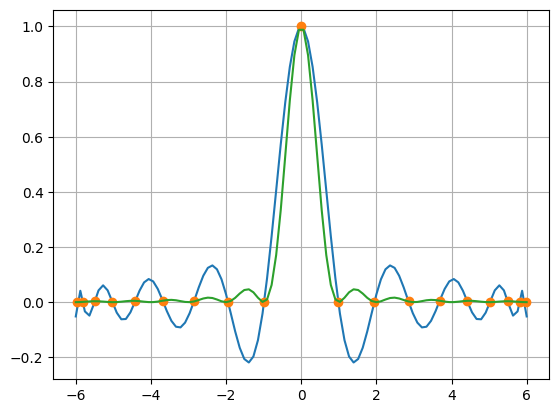

In [70]:
fun = sincaug
c = Chebyshev(a, b, 18, fun)

x = np.linspace(a, b, 100)
y = np.vectorize(c.eval)(x)


plt.grid()
plt.plot(x, y)
plt.plot(c.x, np.vectorize(fun)(c.x), 'o')
plt.plot(x, np.vectorize(fun)(x))
plt.show()

In [45]:
l1norms = []

for d in range(15,100):
    fun = sincaug
    c = Chebyshev(-5, 5, d, fun)

    x = np.linspace(-5, 5, 10000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    l1norms.append(np.linalg.norm(y - y_correct, ord=1))

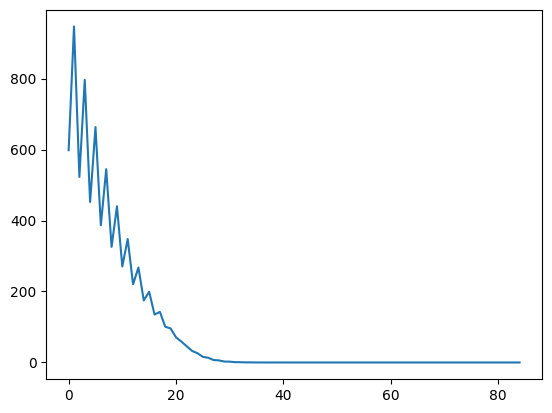

In [46]:
plt.plot(l1norms)

In [49]:
l1norms

[598.0893318873794,
 946.6499503405824,
 522.8154244555283,
 796.425631618978,
 452.254854655704,
 663.2560217227549,
 386.536606908536,
 544.6693195261767,
 325.7085236963278,
 439.9965067250392,
 270.5464392260563,
 347.8166850196293,
 220.33210995841756,
 267.5070611438328,
 174.804381740205,
 199.39231560695947,
 134.98721775645092,
 142.62231993196633,
 100.72868255514307,
 95.82060170925662,
 70.87985743341531,
 58.92007841065199,
 45.566066046099884,
 32.49499419731859,
 26.126407158980165,
 15.90261306524435,
 13.204701693814126,
 6.885214032433099,
 5.868649298237957,
 2.6421799865657656,
 2.300224966344064,
 0.9025883761749194,
 0.7993801473267586,
 0.2759333392757329,
 0.24784507169305953,
 0.07591642593255318,
 0.06898794632016346,
 0.018899365998989465,
 0.01734296677982539,
 0.004279287764075176,
 0.00395948659862813,
 0.0008854888698531268,
 0.0008251210764921579,
 0.00016818465526851224,
 0.0001576707873400442,
 2.9437672108419703e-05,
 2.7743057628546556e-05,
 4.765620

In [71]:
linfnorms = []

for d in range(15,247):
    fun = sincaug
    c = Chebyshev(-32, 32, d, fun)

    x = np.linspace(-32, 32, 10000)
    y = np.vectorize(c.eval, otypes=[float])(x)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    linfnorms.append(np.linalg.norm(y - y_correct, ord=np.inf))

In [72]:
for i in range(len(linfnorms)):
    print("(" +str(i+15) +", " + str(linfnorms[i]) + ")" )

(15, 0.9980140875516843)
(16, 0.9556176410358114)
(17, 0.9939614909028047)
(18, 0.9453048867127032)
(19, 0.9802705166487338)
(20, 0.9340171248455655)
(21, 0.9853823430255457)
(22, 0.9221116681559258)
(23, 0.9979156738737203)
(24, 0.9088579522248195)
(25, 0.9986810373233601)
(26, 0.8957348286411612)
(27, 0.9866177357771019)
(28, 0.8820844484823809)
(29, 0.9664138463991876)
(30, 0.866758492119358)
(31, 0.9513556687743727)
(32, 0.8508127992812993)
(33, 0.9430250596688634)
(34, 0.8352300201679147)
(35, 0.9414272109142837)
(36, 0.8201063823256755)
(37, 0.9463186341716697)
(38, 0.804930179388476)
(39, 0.9587774201731718)
(40, 0.788569098601048)
(41, 0.9729357982856558)
(42, 0.7706985902806871)
(43, 0.9844333262910658)
(44, 0.7519644816270352)
(45, 0.9927754768803478)
(46, 0.7329385711916195)
(47, 0.9979372793653277)
(48, 0.7141176648256501)
(49, 0.9999203159445573)
(50, 0.6957916953986348)
(51, 0.9987879147939331)
(52, 0.6781272648901032)
(53, 0.994453621359115)
(54, 0.6612225855987256)
(55,

### Test for tie-offset

In [82]:
a = -1
b = 1

In [275]:
def sincs(x):
    if x == 0:
        return 1
    return (np.sin(x * np.pi * 128) / (x * np.pi * 128))**2

In [278]:
sincs(0.001)

0.9472476092518273

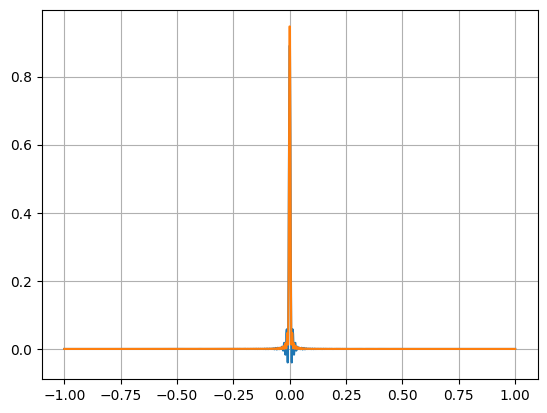

In [279]:
fun = sincs
c = Chebyshev(a, b, 651, fun)

x = np.linspace(a, b, 1000)
y = np.vectorize(c.eval)(x)


plt.grid()
plt.plot(x, y)
#plt.plot(c.x, np.vectorize(fun)(c.x), 'o')
plt.plot(x, np.vectorize(fun)(x))
plt.show()

In [280]:
1/0.001

1000.0

In [323]:
def sincs(x):
    return np.exp(-1000*x)/(1 + np.exp(-1000*x))**2

c = Chebyshev(a, b, 1007, sincs)

x = np.linspace(a, b, 10000)
y = np.vectorize(c.eval, otypes=[float])(x)

y_correct = np.vectorize(sincs, otypes=[float])(x)

np.linalg.norm(y - y_correct, ord=np.inf)

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_1336/1892599987.py:2: RuntimeWarning: overflow encountered in scalar power
  return np.exp(-1000*x)/(1 + np.exp(-1000*x))**2
/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_1336/1892599987.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-1000*x)/(1 + np.exp(-1000*x))**2
/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_1336/1892599987.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.exp(-1000*x)/(1 + np.exp(-1000*x))**2


nan

In [313]:
c.c

[-0.0001213076,
 0.0,
 0.0001196013,
 0.0,
 -0.0001206872,
 -0.0,
 0.0001115861,
 -0.0,
 -0.0001016148,
 -0.0,
 0.0001011455,
 -0.0,
 -9.74154e-05,
 0.0,
 0.0001013779,
 -0.0,
 -9.36088e-05,
 -0.0,
 8.62227e-05,
 0.0,
 -9.13117e-05,
 -0.0,
 9.66535e-05,
 0.0,
 -0.000102962,
 -0.0,
 0.0001085619,
 0.0,
 -0.0001199712,
 -0.0,
 0.0001131809,
 0.0,
 -0.000114372,
 -0.0,
 0.000119779,
 0.0,
 -0.0001228169,
 -0.0,
 0.0001128077,
 0.0,
 -0.0001130512,
 -0.0,
 0.0001088056,
 -0.0,
 -0.000106538,
 0.0,
 9.67339e-05,
 -0.0,
 -9.24264e-05,
 0.0,
 8.80259e-05,
 -0.0,
 -9.74941e-05,
 0.0,
 0.0001031255,
 -0.0,
 -9.78635e-05,
 0.0,
 0.000100865,
 -0.0,
 -0.0001014241,
 0.0,
 0.0001098816,
 -0.0,
 -0.0001146089,
 0.0,
 0.0001157911,
 -0.0,
 -0.0001169163,
 0.0,
 0.0001132015,
 -0.0,
 -0.000114642,
 0.0,
 0.0001084522,
 -0.0,
 -0.0001081037,
 0.0,
 0.0001098063,
 -0.0,
 -9.98754e-05,
 0.0,
 0.0001045604,
 -0.0,
 -0.0001079686,
 0.0,
 0.000102664,
 -0.0,
 -9.59653e-05,
 -0.0,
 9.88535e-05,
 0.0,
 -0.00

In [319]:
c.eval(0)

0.14947540300000026

In [311]:
c.eval(0.01)

0.9998355145106762

In [284]:
c.eval(0.01)

0.017748731335234923

In [253]:
test = [0.0000, -0.821, -0.960, -0.976, 0.821, 0.0000, -0.139, -0.155, 0.960, 0.139, 0.0000, -0.016, 0.976, 0.155, 0.016, -0.000 ]

In [254]:
np.vectorize(c.eval)(test)

array([ 1.00000000e+00, -8.26767086e-04,  9.53594437e-04,  5.71429947e-04,
       -8.26767086e-04,  1.00000000e+00, -1.08762491e-02, -7.72918131e-03,
        9.53594437e-04, -1.08762491e-02,  1.00000000e+00,  2.33487745e-02,
        5.71429947e-04, -7.72918131e-03,  2.33487745e-02,  1.00000000e+00])

In [240]:
clean(c.eval(0.432))

6.406895126378977e-05

In [241]:
linfnorms = []

for d in range(15,16):
    c = Chebyshev(a, b, d, fun)

    x = np.linspace(a, b, 100)
    y = np.vectorize(c.eval, otypes=[float])(x)
    y = np.vectorize(clean, otypes=[float])(y)

    y_correct = np.vectorize(fun, otypes=[float])(x)
    
    linfnorms.append(np.linalg.norm(y - y_correct, ord=np.inf))
    
linfnorms

[0.19949214886967462]

In [103]:
y

array([6.31549534e-08, 6.48174333e-08, 6.64478455e-08, ...,
       6.64478455e-08, 6.48174333e-08, 6.31549534e-08])

In [104]:
clean(c.eval(0))

3.537307679385577e-07

In [199]:
import random

while len(list(set(v))) != 128:
    v = [random.randint(0, 1000) / 1000]
    for i in range(127):
        v.append(random.randint(0, 1000) / 1000)
    
len(list(set(v)))

128

In [200]:
np.array(v)

array([0.99 , 0.302, 0.929, 0.572, 0.717, 0.319, 0.155, 0.321, 0.826,
       0.541, 0.322, 0.561, 0.118, 0.684, 0.298, 0.078, 0.585, 0.013,
       0.778, 0.062, 0.804, 0.673, 0.194, 0.022, 0.677, 0.429, 0.523,
       0.621, 0.627, 0.239, 0.35 , 0.195, 0.29 , 0.071, 0.063, 0.92 ,
       0.214, 0.978, 0.555, 0.542, 0.283, 0.173, 0.209, 0.68 , 0.433,
       0.313, 0.959, 0.184, 0.748, 0.216, 0.954, 0.05 , 0.126, 0.593,
       0.236, 0.165, 0.093, 0.747, 0.88 , 0.664, 0.033, 0.124, 0.122,
       0.249, 0.139, 0.506, 0.993, 0.198, 0.273, 0.234, 0.966, 0.405,
       0.622, 0.661, 0.57 , 0.984, 0.543, 0.692, 0.109, 0.262, 0.457,
       0.294, 0.399, 0.064, 0.478, 0.23 , 0.401, 0.753, 0.847, 0.461,
       0.036, 0.534, 0.392, 0.147, 0.458, 0.947, 0.366, 0.465, 0.045,
       0.663, 0.341, 0.503, 0.402, 0.435, 0.834, 0.653, 0.326, 0.87 ,
       0.074, 0.769, 0.58 , 0.177, 0.551, 0.911, 0.258, 0.586, 0.46 ,
       0.443, 0.886, 0.111, 0.905, 0.573, 0.422, 0.722, 0.755, 0.019,
       0.628, 0.137]

In [142]:
len(v)

128

In [139]:
len(list(set(v)))

120

In [231]:
np.min(np.diff(np.sort(v)))

0.0010000000000000009